In [2]:
#A1
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler

def load_data(path):
    df = pd.read_csv(path)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df_scaled = pd.DataFrame(MaxAbsScaler().fit_transform(df), columns=df.columns)
    return df_scaled

def class_spread_distance(X1, X2):
    mean1 = np.mean(X1, axis=0)
    mean2 = np.mean(X2, axis=0)
    std1 = np.std(X1, axis=0)
    std2 = np.std(X2, axis=0)
    dist = np.linalg.norm(mean1 - mean2)
    return mean1, mean2, std1, std2, dist

if __name__ == "__main__":
    path = r'C:/Users/Jaidev sharma/Desktop/Mental Health Dataset.csv'
    df = load_data(path)
    X = df.drop(columns=["treatment"])
    y = df["treatment"]
    X1 = X[y == 0].head()
    X2 = X[y == 1].head()
    mean1, mean2, std1, std2, distance = class_spread_distance(X1, X2)
    print("Mean 1:", mean1)
    print("Mean 2:", mean2)
    print("STD 1:", std1)
    print("STD 2:", std2)
    print("Interclass distance:", distance)


Mean 1: Timestamp                  0.132297
Gender                     0.000000
Country                    1.000000
Occupation                 0.250000
self_employed              0.000000
family_history             0.200000
Days_Indoors               0.000000
Growing_Stress             1.000000
Changes_Habits             0.500000
Mental_Health_History      1.000000
Mood_Swings                1.000000
Coping_Struggles           0.000000
Work_Interest              0.500000
Social_Weakness            1.000000
mental_health_interview    0.500000
care_options               0.300000
dtype: float64
Mean 2: Timestamp                  0.076339
Gender                     0.000000
Country                    1.000000
Occupation                 0.250000
self_employed              0.600000
family_history             0.800000
Days_Indoors               0.000000
Growing_Stress             1.000000
Changes_Habits             0.500000
Mental_Health_History      1.000000
Mood_Swings                1.0000

Mean: 0.49082735904557334
Variance: 0.12605421606064257


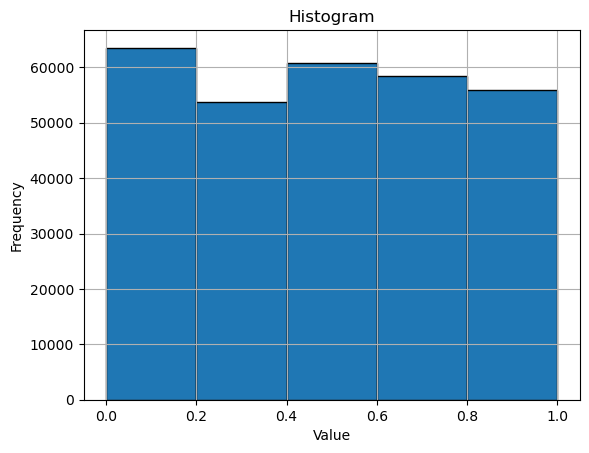

In [3]:
#A2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler

def load_data(path):
    df = pd.read_csv(path)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df_scaled = pd.DataFrame(MaxAbsScaler().fit_transform(df), columns=df.columns)
    return df_scaled

def feature_stats(column):
    return column.mean(), column.var()

def plot_histogram(column):
    plt.hist(column, bins=5, edgecolor='black')
    plt.title("Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    path =  r'C:/Users/Jaidev sharma/Desktop/Mental Health Dataset.csv'
    df = load_data(path)
    feature = df["Days_Indoors"]
    mean, var = feature_stats(feature)
    print("Mean:", mean)
    print("Variance:", var)
    plot_histogram(feature)


r=1, distance=1.503454231433506
r=2, distance=1.1180393247622358
r=3, distance=1.0400419242267602
r=4, distance=1.0152715924684748
r=5, distance=1.0061733085428752
r=6, distance=1.002587372575211
r=7, distance=1.0011123525545684
r=8, distance=1.0004874488165387
r=9, distance=1.0002168257401103
r=10, distance=1.0000976133611796


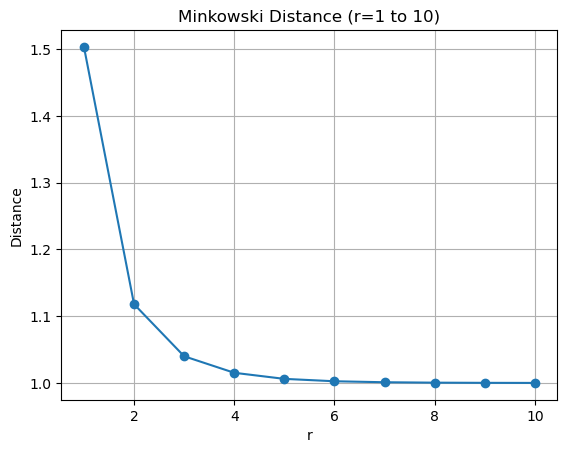

In [4]:
#A3
import numpy as np

def minkowski_distances(v1, v2):
    r_vals = range(1, 11)
    distances = [np.linalg.norm(v1 - v2, ord=r) for r in r_vals]
    return r_vals, distances

def plot_minkowski(r_vals, distances):
    import matplotlib.pyplot as plt
    plt.plot(r_vals, distances, marker='o')
    plt.title("Minkowski Distance (r=1 to 10)")
    plt.xlabel("r")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    df = pd.read_csv(r'C:/Users/Jaidev sharma/Desktop/Mental Health Dataset.csv')
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df_scaled = pd.DataFrame(MaxAbsScaler().fit_transform(df), columns=df.columns)
    X = df_scaled.drop(columns=["treatment"])

    v1, v2 = X.iloc[0].values, X.iloc[1].values
    r_vals, distances = minkowski_distances(v1, v2)
    for r, d in zip(r_vals, distances):
        print(f"r={r}, distance={d}")
    plot_minkowski(r_vals, distances)


In [5]:
#A4
from sklearn.model_selection import train_test_split

def split_data(X, y):
    return train_test_split(X, y, test_size=0.3, random_state=42)

if __name__ == "__main__":
    df = pd.read_csv(r'C:/Users/Jaidev sharma/Desktop/Mental Health Dataset.csv')
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df_scaled = pd.DataFrame(MaxAbsScaler().fit_transform(df), columns=df.columns)

    X = df_scaled.drop(columns=["treatment"])
    y = df_scaled["treatment"]
    X_train, X_test, y_train, y_test = split_data(X, y)
    print("Train size:", len(X_train))
    print("Test size:", len(X_test))


Train size: 204654
Test size: 87710


In [6]:
#A5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split

def load_data(path):
    df = pd.read_csv(path)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df_scaled = pd.DataFrame(MaxAbsScaler().fit_transform(df), columns=df.columns)
    return df_scaled

def train_knn(X_train, y_train, k=3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

if __name__ == "__main__":
    df = load_data(r'C:/Users/Jaidev sharma/Desktop/Mental Health Dataset.csv')
    X = df.drop(columns=["treatment"])
    y = df["treatment"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = train_knn(X_train, y_train)
    print("kNN model trained on dataset.")


kNN model trained on dataset.


In [7]:
#A6
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def load_data(path):
    df = pd.read_csv(path)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df_scaled = pd.DataFrame(MaxAbsScaler().fit_transform(df), columns=df.columns)
    return df_scaled

def train_knn(X_train, y_train, k=3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(np.ascontiguousarray(X_train.values), y_train.values)
    return model

def evaluate_accuracy(model, X_test, y_test):
    return model.score(np.ascontiguousarray(X_test.values), y_test.values)

if __name__ == "__main__":
    df = load_data(r'C:/Users/Jaidev sharma/Desktop/Mental Health Dataset.csv')
    X = df.drop(columns=["treatment"])
    y = df["treatment"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = train_knn(X_train, y_train)
    acc = evaluate_accuracy(model, X_test, y_test)
    print("Accuracy ", acc)


C:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^

Accuracy  0.6417170220043324


In [8]:
#A7
def predict(model, X_test):
    return model.predict(np.ascontiguousarray(X_test.values))

if __name__ == "__main__":
    df = load_data(r'C:/Users/Jaidev sharma/Desktop/Mental Health Dataset.csv')
    X = df.drop(columns=["treatment"])
    y = df["treatment"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = train_knn(X_train, y_train)
    y_pred = predict(model, X_test)
    print("Predictions:", y_pred[:10])


Predictions: [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


In [ ]:
#A8
import matplotlib.pyplot as plt

def accuracy_vs_k(X_train, y_train, X_test, y_test):
    k_vals = range(1, 12)
    accuracies = []
    for k in k_vals:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(np.ascontiguousarray(X_train.values), y_train.values)
        acc = model.score(np.ascontiguousarray(X_test.values), y_test.values)
        accuracies.append(acc)
    return list(k_vals), accuracies

def plot_accuracy_k(k_vals, accuracies):
    plt.plot(k_vals, accuracies, marker='o')
    plt.title("Accuracy vs k")
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    df = load_data(r'C:/Users/Jaidev sharma/Desktop/Mental Health Dataset.csv')
    X = df.drop(columns=["treatment"])
    y = df["treatment"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    k_vals, accs = accuracy_vs_k(X_train, y_train, X_test, y_test)
    for k, acc in zip(k_vals, accs):
        print(f" k={k}, Accuracy={acc:.4f}")
    plot_accuracy_k(k_vals, accs)



In [9]:
#A9
from sklearn.metrics import confusion_matrix, classification_report

def evaluation_report(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return cm, report

if __name__ == "__main__":
    df = load_data(r'C:\Users\koppe\Desktop\Mental Health Dataset.csv')
    X = df.drop(columns=["treatment"])
    y = df["treatment"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = train_knn(X_train, y_train)
    y_pred = predict(model, X_test)
    cm, report = evaluation_report(y_test.values, y_pred)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)


Confusion Matrix:
 [[27488 16041]
 [15383 28798]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.63      0.64     43529
         1.0       0.64      0.65      0.65     44181

    accuracy                           0.64     87710
   macro avg       0.64      0.64      0.64     87710
weighted avg       0.64      0.64      0.64     87710

